# Fourier series/expansion

## Using sympy:

We can use the fourier_series() function:
https://docs.sympy.org/latest/modules/series/fourier.html

### Example 1:

Calculate the Fourier expansion of:

$f(x) = x^2$

In [69]:
# Importing libraries

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [70]:
# Define symbols
x = sp.symbols('x')

# Function f(x)
y = lambda x: x**2

# Get Fourier series of function
result = sp.fourier_series(x**2, (x, -np.pi, np.pi))

# Same, but using pi from sympy instead of numpy
result1 = sp.fourier_series(x**2, (x, -sp.pi, sp.pi))

# Truncate result to n=20 terms
result_truncated = result.truncate(n=3)
result_truncated1 = result1.truncate(n=3)

# Both show the same result
print(result_truncated)
print()
print(result_truncated1)

-39.4784176043574*cos(0.318309886183791*pi*x)/pi**2 + 9.86960440108936*cos(0.636619772367581*pi*x)/pi**2 + 3.28986813369645

-4*cos(x) + cos(2*x) + pi**2/3


In [71]:
print(type(result_truncated1))


<class 'sympy.core.add.Add'>


### Axes:

In [72]:
# Define the x axis
x_axis = np.arange(-np.pi, np.pi, 0.001)

# We evaluate the y function in our x axis
y_axis = y(x_axis)

# This is wrong
#a = result_truncated1(x_axis)

# This is the correct, this is the way to evaluate a sympy object
y_series = sp.lambdify(x, result_truncated1, "numpy")

print(type(y_series))
y_eval = y_series(x_axis)

#print(y_eval)

<class 'function'>


### Plotting:

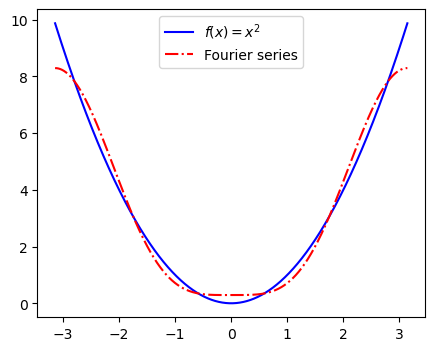

In [73]:
plt.figure(figsize=(5, 4))

plt.plot(x_axis, y_axis, label = r'$f(x)=x^2$', c ='blue')
plt.plot(x_axis, y_eval, label = 'Fourier series', c ='red', linestyle = '-.')

plt.legend()

plt.show()

## Example 2:

Calculate the Fourier expansion of:

$f(x) = 
\left\{
    \begin{array}{lr}
        0, & -\pi \leq x \leq -\frac{\pi}{2}\\
        1, & -\frac{\pi}{2} \leq x \leq +\frac{\pi}{2}\\
        0, & +\frac{\pi}{2} \leq x \leq +\pi
    \end{array}
\right\}$



In [74]:
def function(x):
    """
    This is a piece-wise function for the top-hat function showsn above.
    """
    
    if(-np.pi <= x <= -0.5*np.pi):
        return 0

    elif(-0.5*np.pi <= x <= +0.5*np.pi):
        return 1
    
    else:
        return 0

### Define axes:

In [75]:
# X vector
x = np.arange(-np.pi, np.pi, 0.001)

# This is wrong:
#yy = function(x)

In [76]:
# Empty list (needed)
y = []

# Loop to append the evaluated points
for i in range(len(x)):
    y.append(function(x[i]))

# Convert to an array
y = np.array(y)

In [77]:
print(x.size, y.size)

6284 6284


### Plotting:


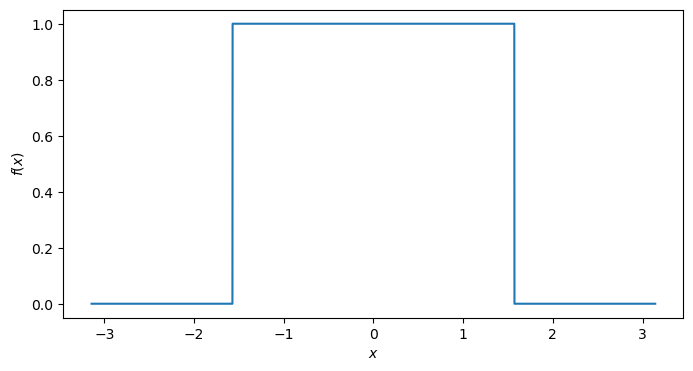

In [78]:
plt.figure(figsize=(8, 4))

plt.plot(x, y)

plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")

plt.show()

https://en.wikipedia.org/wiki/Fourier_series

In [79]:
def function_Fourier(x, n):
    """
    This is a function to calculate the Fourier expansion.
    Inputs: x -> vector for the domain
            n -> the trunction integer
    """
    
    # Empty array
    f = np.zeros(x.size)

    # Add the first term
    f = f + 0.5

    for i in range(1,n+1):
        #print(i)
        y = (2/np.pi)*((-1)**(i-1))*(1/(2*i-1))*np.cos((2*i - 1)*x)

        # Adding the next Fourier terms
        f += y 
        
    return f

## Plotting

In [80]:
# Evaluate our Fourier series

fourier_1 = function_Fourier(x, 1)
fourier_2 = function_Fourier(x, 2)
fourier_10 = function_Fourier(x, 10)
fourier_50 = function_Fourier(x, 50)

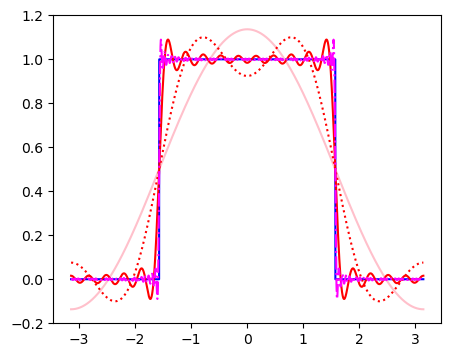

In [81]:
plt.figure(figsize=(5, 4))

plt.plot(x, y, c ='blue')
plt.plot(x, fourier_1, c = 'pink')
plt.plot(x, fourier_2, c = 'red', linestyle =':')
plt.plot(x, fourier_10, c = 'red', linestyle ='-')
plt.plot(x, fourier_50, c = 'magenta', linestyle ='-.')

plt.show()

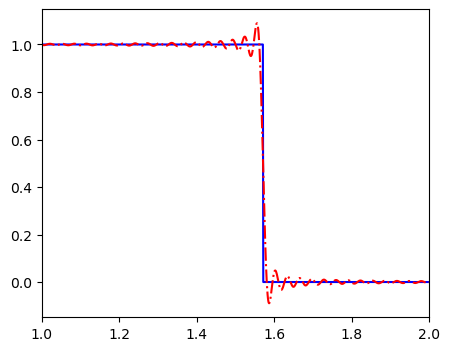

In [82]:
plt.figure(figsize=(5, 4))

plt.plot(x, y, c ='blue')
#plt.plot(x, function_Fourier(x, 1), c = 'red')
#plt.plot(x, function_Fourier(x, 2), c = 'red', linestyle =':')
plt.plot(x, function_Fourier(x, 100), c = 'red', linestyle ='-.')

plt.xlim(1,2)

plt.show()

## Piece-wise function using sympy:

In [83]:
# Define the symbol
xx = sp.Symbol('x')

# Define the piece wise function
phi_1 = sp.Piecewise((0, xx < -sp.pi/2), (0, xx > +sp.pi/2), (1, True))

print(phi_1)

# This is converting our sympy object into a numpy one
y_func = sp.lambdify(xx, phi_1, "numpy")

# Evaluate the function using the x vector
y_axis = y_func(x_axis)

Piecewise((0, (x > pi/2) | (x < -pi/2)), (1, True))


## Fourier series of piece-wise function:

In [84]:
# Getting the Fourier series
y_fourier = sp.fourier_series(phi_1, (xx, -sp.pi, sp.pi))

# We truncate it
y_fouriertruncated1 = y_fourier.truncate(n=20)

print(y_fouriertruncated1)

# This is converting our sympy object for thr Fourier expansion into a numpy one
y_func2 = sp.lambdify(xx, y_fouriertruncated1, "numpy")

# Evaluate the function using the x vector
y_axis2 = y_func2(x_axis)

2*cos(x)/pi - 2*cos(3*x)/(3*pi) + 2*cos(5*x)/(5*pi) - 2*cos(7*x)/(7*pi) + 2*cos(9*x)/(9*pi) - 2*cos(11*x)/(11*pi) + 2*cos(13*x)/(13*pi) - 2*cos(15*x)/(15*pi) + 2*cos(17*x)/(17*pi) - 2*cos(19*x)/(19*pi) + 2*cos(21*x)/(21*pi) - 2*cos(23*x)/(23*pi) + 2*cos(25*x)/(25*pi) - 2*cos(27*x)/(27*pi) + 2*cos(29*x)/(29*pi) - 2*cos(31*x)/(31*pi) + 2*cos(33*x)/(33*pi) - 2*cos(35*x)/(35*pi) + 2*cos(37*x)/(37*pi) + 1/2


## Plotting:

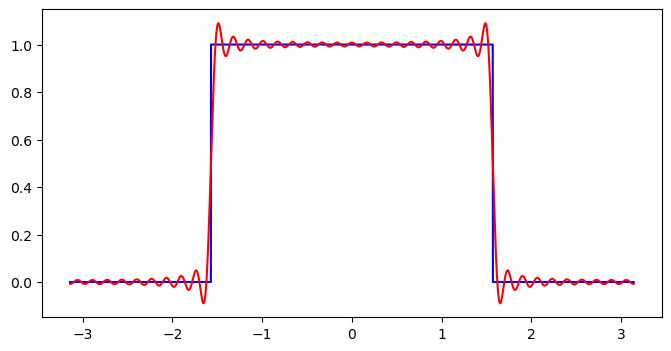

In [55]:
plt.figure(figsize=(8, 4))

plt.plot(x_axis, y_axis, c ='blue')
plt.plot(x_axis, y_axis2, c ='red')

plt.show()

## Using Riemann sums for the integral definitions:

In [56]:
def c0():
    c_0 = y_axis
    return c_0.sum()/c_0.size

def cn(n):
    c = y_axis*np.exp(-1j*2*n*np.pi*x_axis/period)
    return c.sum()/c.size

def f(x_axis, Nh):
    f = np.array([2*cn(i)*np.exp(1j*2*i*np.pi*x_axis/period) for i in range(1,Nh+1)])
    return c0() + f.sum()

In [59]:
period = 2*np.pi

print(c0())

x_axis = np.arange(-np.pi, np.pi, 0.001)

y_riemann = np.array([f(t,30).real for t in x_axis])

0.5


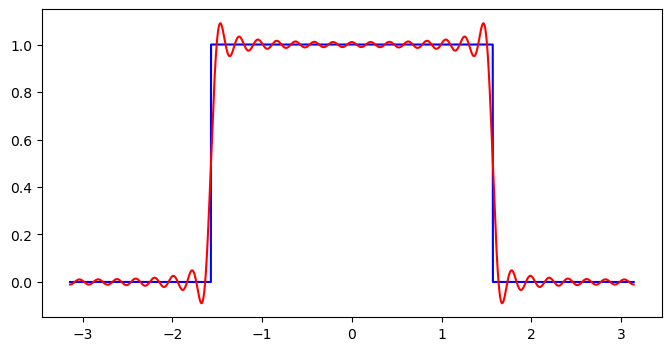

In [60]:
plt.figure(figsize=(8, 4))
plt.plot(x_axis, y_axis, c ='blue')
plt.plot(x_axis, y_riemann, c ='red')
plt.show()